# Convolutional Neural Networks: Application

## Table of Contents

- [1 - Packages](#1)
    - [1.1 - Load the Data and Split the Data into Train/Test Sets](#1-1)
- [2 - Layers in TF Keras](#2)
- [3 - The Sequential API](#3)
    - [3.1 - Create the Sequential Model](#3-1)
        - [Exercise 1 - happyModel](#ex-1)
    - [3.2 - Train and Evaluate the Model](#3-2)
- [4 - The Functional API](#4)
    - [4.1 - Load the SIGNS Dataset](#4-1)
    - [4.2 - Split the Data into Train/Test Sets](#4-2)
    - [4.3 - Forward Propagation](#4-3)
        - [Exercise 2 - convolutional_model](#ex-2)
    - [4.4 - Train the Model](#4-4)
- [5 - History Object](#5)
- [6 - Bibliography](#6)

<a name='1'></a>
## 1 - Packages

In [2]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops
from cnn_utils import *
from test_utils import summary, comparator

%matplotlib inline
np.random.seed(1)

In [3]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_happy_dataset()
X_train = X_train_orig/255.
X_test = X_test_orig/255.
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


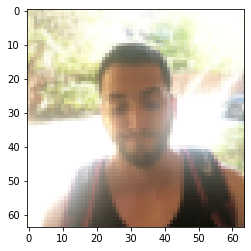

In [4]:
index = 124
plt.imshow(X_train_orig[index]) #display sample training image
plt.show()

<a name='3'></a>
## 3 - The Sequential API

In [5]:
def happyModel():
    """
    Implements the forward propagation for the binary classification model:
    ZEROPAD2D -> CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> FLATTEN -> DENSE
    
    Note that for simplicity and grading purposes, you'll hard-code all the values
    such as the stride and kernel (filter) sizes. 
    Normally, functions should take these values as function parameters.
    
    Arguments:
    None

    Returns:
    model -- TF Keras model (object containing the information for the entire training process) 
    """
    model = tf.keras.Sequential([
            tf.keras.layers.ZeroPadding2D(padding=(3,3), input_shape=(64, 64, 3)),
            tf.keras.layers.Conv2D(32, (7,7), strides=(1,1)),
            tf.keras.layers.BatchNormalization(axis=3),
            tf.keras.layers.ReLU(),
            tf.keras.layers.MaxPool2D(),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(1,activation='sigmoid') 
        ])
    
    return model

In [6]:
happy_model = happyModel()
for layer in summary(happy_model):
    print(layer)
    
output = [['ZeroPadding2D', (None, 70, 70, 3), 0, ((3, 3), (3, 3))],
            ['Conv2D', (None, 64, 64, 32), 4736, 'valid', 'linear', 'GlorotUniform'],
            ['BatchNormalization', (None, 64, 64, 32), 128],
            ['ReLU', (None, 64, 64, 32), 0],
            ['MaxPooling2D', (None, 32, 32, 32), 0, (2, 2), (2, 2), 'valid'],
            ['Flatten', (None, 32768), 0],
            ['Dense', (None, 1), 32769, 'sigmoid']]
    
comparator(summary(happy_model), output)

['ZeroPadding2D', (None, 70, 70, 3), 0, ((3, 3), (3, 3))]
['Conv2D', (None, 64, 64, 32), 4736, 'valid', 'linear', 'GlorotUniform']
['BatchNormalization', (None, 64, 64, 32), 128]
['ReLU', (None, 64, 64, 32), 0]
['MaxPooling2D', (None, 32, 32, 32), 0, (2, 2), (2, 2), 'valid']
['Flatten', (None, 32768), 0]
['Dense', (None, 1), 32769, 'sigmoid']
All tests passed!


In [7]:
happy_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

In [8]:
happy_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 70, 70, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 64, 32)        4736      
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 32)        128       
_________________________________________________________________
re_lu (ReLU)                 (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0         
_________________________________________________________________
dense (Dense)                (None, 1)                 3

<a name='3-2'></a>
### 3.2 - Train and Evaluate the Model

In [9]:
happy_model.fit(X_train, Y_train, epochs=10, batch_size=16)

Epoch 1/10
38/38 [==============================] - 4s 100ms/step - loss: 0.9293 - accuracy: 0.7450
Epoch 2/10
38/38 [==============================] - 4s 97ms/step - loss: 0.2254 - accuracy: 0.9167
Epoch 3/10
38/38 [==============================] - 4s 97ms/step - loss: 0.1366 - accuracy: 0.9517
Epoch 4/10
38/38 [==============================] - 4s 95ms/step - loss: 0.0925 - accuracy: 0.9800
Epoch 5/10
38/38 [==============================] - 4s 97ms/step - loss: 0.0847 - accuracy: 0.9733
Epoch 6/10
38/38 [==============================] - 4s 97ms/step - loss: 0.0957 - accuracy: 0.9633
Epoch 7/10
38/38 [==============================] - 4s 95ms/step - loss: 0.0937 - accuracy: 0.9683
Epoch 8/10
38/38 [==============================] - 4s 97ms/step - loss: 0.1007 - accuracy: 0.9567
Epoch 9/10
38/38 [==============================] - 4s 95ms/step - loss: 0.0910 - accuracy: 0.9667
Epoch 10/10
38/38 [==============================] - 4s 97ms/step - loss: 0.0485 - accuracy: 0.9833


In [10]:
happy_model.evaluate(X_test, Y_test)

5/5 [==============================] - 0s 31ms/step - loss: 0.1667 - accuracy: 0.9333


[0.16671158373355865, 0.9333333373069763]

<a name='4'></a>
## 4 - The Functional API

In [11]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_signs_dataset()

<img src="images/SIGNS.png" style="width:800px;height:300px;">

The next cell will show you an example of a labelled image in the dataset. Feel free to change the value of `index` below and re-run to see different examples. 

y = 4


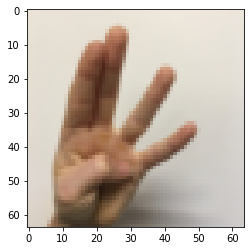

In [12]:
index = 9
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

In [13]:
X_train = X_train_orig/255.
X_test = X_test_orig/255.
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


In [14]:
def convolutional_model(input_shape):
    """
    Implements the forward propagation for the model:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> DENSE
    
    Note that for simplicity and grading purposes, you'll hard-code some values
    such as the stride and kernel (filter) sizes. 
    Normally, functions should take these values as function parameters.
    
    Arguments:
    input_img -- input dataset, of shape (input_shape)

    Returns:
    model -- TF Keras model (object containing the information for the entire training process) 
    """

    input_img = tf.keras.Input(shape=input_shape)
    Z1 = tf.keras.layers.Conv2D(filters=8,kernel_size=(4,4),strides=(1, 1),padding='same')(input_img)
    A1 = tf.keras.layers.ReLU()(Z1)
    P1 = tf.keras.layers.MaxPool2D(pool_size=(8,8), strides=8,padding='same')(A1)
    Z2 = tf.keras.layers.Conv2D(filters=16,kernel_size=(2,2),strides=(1, 1),padding='same')(P1)
    A2 = tf.keras.layers.ReLU()(Z2)
    P2 = tf.keras.layers.MaxPool2D(pool_size=(4,4), strides=4,padding='same')(A2)
    F = tf.keras.layers.Flatten()(P2)
    outputs = tf.keras.layers.Dense(units=6, activation='softmax')(F)
    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

In [15]:
conv_model = convolutional_model((64, 64, 3))
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
conv_model.summary()
    
output = [['InputLayer', [(None, 64, 64, 3)], 0],
        ['Conv2D', (None, 64, 64, 8), 392, 'same', 'linear', 'GlorotUniform'],
        ['ReLU', (None, 64, 64, 8), 0],
        ['MaxPooling2D', (None, 8, 8, 8), 0, (8, 8), (8, 8), 'same'],
        ['Conv2D', (None, 8, 8, 16), 528, 'same', 'linear', 'GlorotUniform'],
        ['ReLU', (None, 8, 8, 16), 0],
        ['MaxPooling2D', (None, 2, 2, 16), 0, (4, 4), (4, 4), 'same'],
        ['Flatten', (None, 64), 0],
        ['Dense', (None, 6), 390, 'softmax']]
    
comparator(summary(conv_model), output)

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 8)         392       
_________________________________________________________________
re_lu_1 (ReLU)               (None, 64, 64, 8)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 16)          528       
_________________________________________________________________
re_lu_2 (ReLU)               (None, 8, 8, 16)          0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 16)         

In [16]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).batch(64)
history = conv_model.fit(train_dataset, epochs=100, validation_data=test_dataset)

Epoch 1/100
17/17 [==============================] - 2s 118ms/step - loss: 1.9402 - accuracy: 0.1667 - val_loss: 1.8109 - val_accuracy: 0.1667
Epoch 2/100
17/17 [==============================] - 2s 106ms/step - loss: 1.7937 - accuracy: 0.1917 - val_loss: 1.7856 - val_accuracy: 0.2583
Epoch 3/100
17/17 [==============================] - 2s 106ms/step - loss: 1.7832 - accuracy: 0.2167 - val_loss: 1.7804 - val_accuracy: 0.2417
Epoch 4/100
17/17 [==============================] - 2s 106ms/step - loss: 1.7799 - accuracy: 0.2074 - val_loss: 1.7786 - val_accuracy: 0.2500
Epoch 5/100
17/17 [==============================] - 2s 106ms/step - loss: 1.7769 - accuracy: 0.2435 - val_loss: 1.7763 - val_accuracy: 0.3417
Epoch 6/100
17/17 [==============================] - 2s 112ms/step - loss: 1.7734 - accuracy: 0.2935 - val_loss: 1.7742 - val_accuracy: 0.3750
Epoch 7/100
17/17 [==============================] - 2s 111ms/step - loss: 1.7699 - accuracy: 0.3102 - val_loss: 1.7711 - val_accuracy: 0.3333

Epoch 58/100
17/17 [==============================] - 2s 106ms/step - loss: 0.5486 - accuracy: 0.8185 - val_loss: 0.6179 - val_accuracy: 0.7667
Epoch 59/100
17/17 [==============================] - 2s 102ms/step - loss: 0.5399 - accuracy: 0.8213 - val_loss: 0.6100 - val_accuracy: 0.7667
Epoch 60/100
17/17 [==============================] - 2s 106ms/step - loss: 0.5314 - accuracy: 0.8231 - val_loss: 0.6023 - val_accuracy: 0.7667
Epoch 61/100
17/17 [==============================] - 2s 106ms/step - loss: 0.5235 - accuracy: 0.8250 - val_loss: 0.5953 - val_accuracy: 0.7667
Epoch 62/100
17/17 [==============================] - 2s 106ms/step - loss: 0.5157 - accuracy: 0.8296 - val_loss: 0.5884 - val_accuracy: 0.7750
Epoch 63/100
17/17 [==============================] - 2s 106ms/step - loss: 0.5080 - accuracy: 0.8324 - val_loss: 0.5814 - val_accuracy: 0.7750
Epoch 64/100
17/17 [==============================] - 2s 111ms/step - loss: 0.5007 - accuracy: 0.8343 - val_loss: 0.5748 - val_accuracy:

In [17]:
history.history

{'loss': [1.9402216672897339,
  1.7937369346618652,
  1.783207654953003,
  1.7798516750335693,
  1.7769477367401123,
  1.7734483480453491,
  1.7698811292648315,
  1.7649898529052734,
  1.7581907510757446,
  1.7494131326675415,
  1.7394049167633057,
  1.7264010906219482,
  1.710638165473938,
  1.6912888288497925,
  1.6682336330413818,
  1.641160488128662,
  1.609938144683838,
  1.5744596719741821,
  1.5344278812408447,
  1.4921547174453735,
  1.446739673614502,
  1.4000858068466187,
  1.356717824935913,
  1.3139207363128662,
  1.2620700597763062,
  1.2150534391403198,
  1.1735060214996338,
  1.1300231218338013,
  1.0882375240325928,
  1.0505802631378174,
  1.0161429643630981,
  0.9836193919181824,
  0.9525266289710999,
  0.9220879077911377,
  0.8950839638710022,
  0.8711393475532532,
  0.8472230434417725,
  0.8257002234458923,
  0.8044157028198242,
  0.7855464220046997,
  0.7666721940040588,
  0.7490552067756653,
  0.731658399105072,
  0.7150545716285706,
  0.69866943359375,
  0.6830244

Now visualize the loss over time using `history.history`: 

[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epoch')]

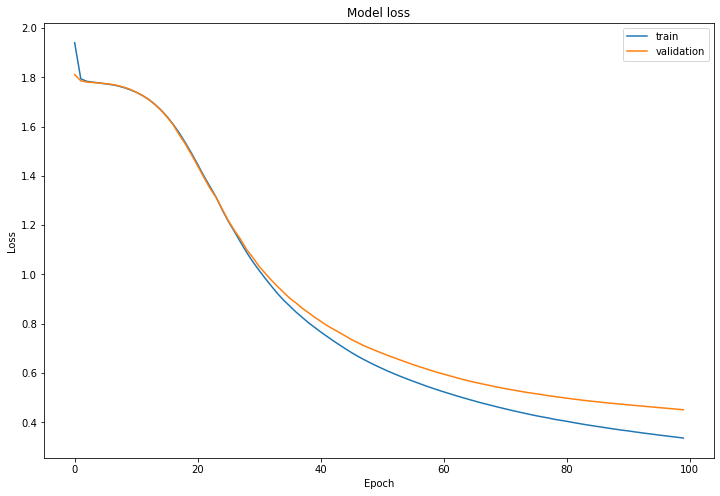

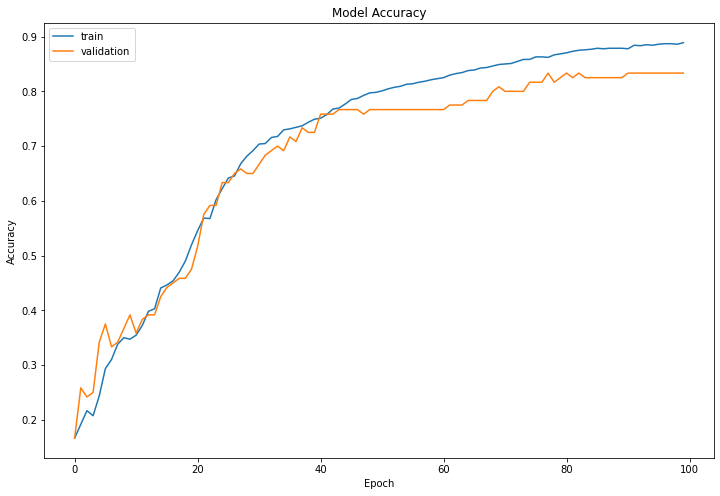

In [18]:
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')